In [ ]:
!pip install gdown -q
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 32.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from google.colab import drive

# 1. 구글 드라이브를 '/content/drive' 폴더에 연결(마운트)
drive.mount('/content/drive')

# 2. '/content/drive/MyDrive/'로 시작하는 전체 경로로 수정
file_path = '/content/drive/MyDrive/수업/데이터 분석/회사 내부 강의/3일차/data/충북일보데이터.xlsx'

# 3. pandas로 엑셀 파일 읽기
df = pd.read_excel(file_path)
# 데이터 확인
display(df['제목'].head())

Mounted at /content/drive


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,제목
0,‘마피’ 떴던 광명 아파트 보류지 1원도 안 깎고 다시 나왔다 [부동산360]
1,설탕에서 K콘텐츠까지 CJ의 사업보국 70년
2,'억대 연봉' 은행원은 좋겠네 퇴직 후에도 연봉 4300만원 준다는 '이곳'
3,공공임대 살면서 억대 자동차 몬다? 한국 안되는데 일본 깜짝 '반전'
4,"""아침부터 오픈런 미어터지겠네"" 통닭 한 마리 3500원에 쏘는 '이곳'"


In [ ]:
from konlpy.tag import Okt
import re
okt = Okt()

def extract_nouns(text):
    # 불용어 정의
    stopwords = ['의', '가', '이', '은', '는', '도', '을', '를', '에', '와', '과', '에서',
             '다', '한', '지', '만원', '년', '원', '곳', '마리']
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', "", text) # 특수문자 제거
    nouns = okt.nouns(text)
    filtered_nouns = [n for n in nouns if len(n) > 1 and n not in stopwords]
    return ' '.join(filtered_nouns)

In [ ]:
# 모든 제목에 함수 적용하여 명사 추출
df['nouns'] = df['제목'].apply(extract_nouns)
print(df[['제목', 'nouns']])

                                                      제목  \
0            ‘마피’ 떴던 광명 아파트 보류지 1원도 안 깎고 다시 나왔다 [부동산360]   
1                              설탕에서 K콘텐츠까지  CJ의 사업보국 70년   
2             '억대 연봉' 은행원은 좋겠네 퇴직 후에도 연봉 4300만원 준다는 '이곳'   
3                 공공임대 살면서 억대 자동차 몬다? 한국 안되는데 일본 깜짝 '반전'   
4               "아침부터 오픈런 미어터지겠네" 통닭 한 마리 3500원에 쏘는 '이곳'   
...                                                  ...   
19995                          보금자리론 상반기 8조 하반기엔 더 늘어날 듯   
19996             배임으로 처벌 남발 기업 옥죄는 '경제 형벌' 최소 200개 솎아낸다   
19997                             부실채권 느는데 상생에 허리휘는 4대금융   
19998  [단독] “사업성 얼마나 될 지 모르는데” 한수원, 친환경 보폭 맞추려 해상풍력 전...   
19999                             금융위 "새 차 수리 땐 순정부품 허용"   

                                  nouns  
0                   마피 광명 아파트 보류 다시 부동산  
1                          설탕 콘텐츠 사업 보국  
2                       억대 연봉 은행원 퇴직 연봉  
3              임대 억대 자동차 몬다 한국 일본 깜짝 반전  
4                              아침 오픈 통닭  
...                        

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer 객체 생성
vectorizer = CountVectorizer()

# 명사 데이터를 학습하고 DTM 생성
dtm = vectorizer.fit_transform(df['nouns'])

# DTM을 데이터프레임으로 변환
keyword_counts = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# 단어 빈도 합산
word_freq = keyword_counts.sum(axis=0).sort_values(ascending=False)

print("\n\n단어 빈도수(상위 10개):")
display(word_freq.head(10))



단어 빈도수(상위 10개):


,0
영업,1366
관세,979
투자,978
상반기,806
매출,750
최대,731
기업,718
출시,659
실적,620
시장,576


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126371 files and direc

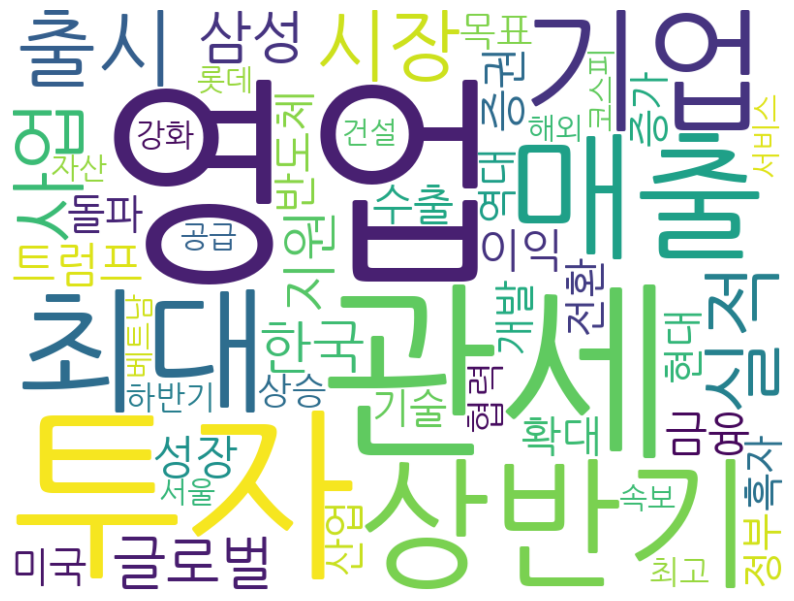

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from PIL import Image
import numpy as np

# 나눔고딕 폰트 경로 찾기
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 마스크 이미지 파일 경로 (코랩 환경에서 사용하려면 파일을 업로드해야 함)
# mask_path = "./gorilla.jpg"
# mask_image = Image.open(mask_path)
# mask_array = np.array(mask_image)

# 폰트 캐시 업데이트 (선택 사항)
# fm._rebuild()

# matplotilb 폰트 설정
plt.rc('font', family='NanumGothic')

# WordCloud 폰트 경로 지정
wc = WordCloud(font_path=font_path,
               background_color='white',
               max_words=50,
               width=800,
               height=600,
              #  mask=mask_array
               )

# 빈도 데이터(word_freq)를 활용하여 워드 클라우드 생성
wordcloud = wc.generate_from_frequencies(word_freq)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 축 제거
plt.show()